In [2]:
from asammdf import MDF
import easygui
import pandas as pd
import glob, os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binned_statistic_2d 

**Reading INCA recording and converting it into pandas dataframe**

In [3]:
plt.close('all')
#asks the dat file from user
datFiles = easygui.fileopenbox(msg='Select dat files', default='*.dat', multiple = True)
#get the folderpath of dat file
folderPath = os.path.dirname(datFiles[0])
#dictionary of dataframes
dfs = {}
for datFile in datFiles:
    #get the basename of the file 
    baseName = os.path.basename(datFile)[:-4]
    modalFileName = baseName + ".xls"
    modalFilePath = os.path.join(folderPath, modalFileName)
    #create directory to store all the plots
    graphFolderPath = os.path.join(folderPath, baseName)
    if not os.path.exists(graphFolderPath):
        os.mkdir(graphFolderPath)
    xlsModalFile = pd.ExcelFile(modalFilePath)
    #reading the modal data
    dfModal = xlsModalFile.parse('Data')
    #reading the mdf file
    mdf = MDF(datFile)
    #getting all signals in mdf object
    allSignals = list(mdf.channels_db.keys())
    measuredSignals = []
    #remove signals with CPP in it
    for signal in allSignals:
        if not(("CCP" in signal) or ("_sword" in signal) or "$" in signal):
            measuredSignals.append(signal)
    #creating an empty list of important signals
    impSignals = ['cps_n_engine', 'egr_b_operate_valve', 
                      'egr_T_exhaust_temperature', 'egr_T_oil_temperature',
                      'egr_T_limiting_temp_low', 'egr_T_limiting_temp_high',
                      'egr_P_exhaustp']
    df = mdf.to_dataframe(
            channels=impSignals,
            raster= 'egr_b_operate_valve',
            time_from_zero=True,
            empty_channels="zeros",
            keep_arrays=False,
            use_display_names=True,
            time_as_date=True,
            reduce_memory_usage=True,
            raw=False,
            ignore_value2text_conversions=False)
    #remove \CCP from column names of dataframe
    df.columns = [col.split('\\')[0] for col in df.columns]
    
    df = df.resample('S').mean()
    mdf.close()

**Capturing MODAL data**

In [4]:
 for datFile in datFiles:
        #get the basename of the file 
        baseName = os.path.basename(datFile)[:-4]
        modalFileName = baseName + ".xls"
        modalFilePath = os.path.join(folderPath, modalFileName)
        #create directory to store all the plots
        graphFolderPath = os.path.join(folderPath, baseName)
        if not os.path.exists(graphFolderPath):
            os.mkdir(graphFolderPath)
        xlsModalFile = pd.ExcelFile(modalFilePath)
        #reading the modal data
        dfModal = xlsModalFile.parse('Data')

<function matplotlib.pyplot.show(*args, **kw)>

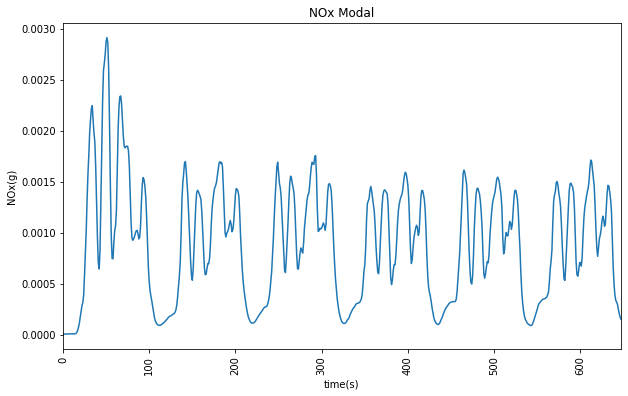

In [5]:
dfModal['NOx'] = dfModal['NOx_grams (Dil)\n[grams]'].values

dfModal['NOx'].plot(kind='line', figsize=(10, 6), rot=90) 

plt.xlabel('time(s)')
plt.ylabel('NOx(g)')
plt.title('NOx Modal')

plt.show